# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

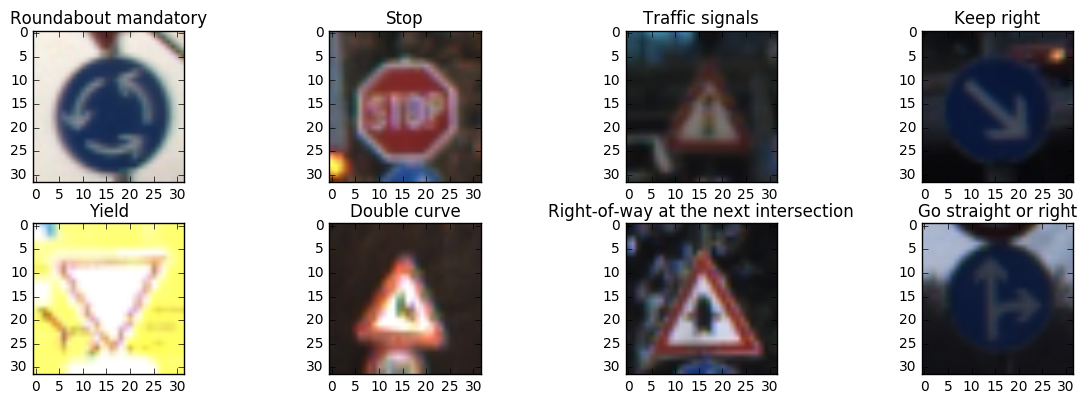

In [4]:
import numpy as np
# Let's also get sign name
signs = []
with open('signnames.csv') as csvfile:
    line = csvfile.readline()  # jump over headers
    for line in csvfile.readlines():
        signs.append(line.strip().split(',')[1])
fig, ax = plt.subplots(2,4)
# keep some ramdomly selected images to do test on them
samples = np.random.randint(0, n_train, 8)
fig.set_size_inches(12,4)
fig.tight_layout()
for axis, n in zip(ax.flatten(), samples):
    axis.imshow(X_train[n])
    axis.set_title(signs[y_train[n]])

Histrogram showing the number of samples in each class. There are certain clases with a much higher count of samples

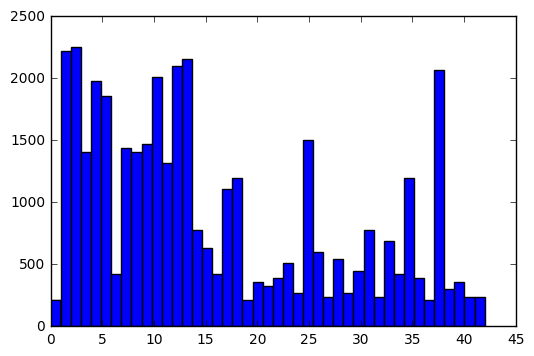

In [5]:
f = plt.hist(y_train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

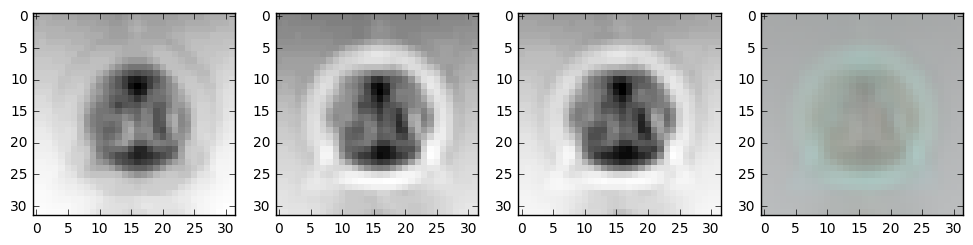

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Let's check how the mean image looks like on each channel
mean_image = np.mean(X_train, axis=0).astype(int)
fig, ax = plt.subplots(1,4)
fig.set_size_inches(12,4)
for i in range(3):
    ax[i].imshow(mean_image[:,:,i], cmap='Greys', interpolation='none')
ax[3].imshow(mean_image, interpolation='none', vmin=0, vmax=255)

In [7]:
# zero center images and normalize them with values from the training set
# create index of random idetifiers to divide the training set
# fraction reserved for validation
val_frac = 0.3

from sklearn.model_selection import train_test_split
training_x, validation_x, training_y, validation_y = train_test_split(X_train, y_train, test_size=val_frac)
# Normalize all data (training + validation) but with statistics from training set
mean = np.mean(training_x, axis=0)
std = np.std(training_x, axis=0)
training_x = (training_x - mean) / std
validation_x = (validation_x - mean) / std

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I've have done the standard procedure of centering the data around its mean and scaling it by its standard deviation. This is useful to make life easier for the optimizer. In this case, I believe it will not make a huge difference. I believe so because this is useful for features that are different in range. Since we are talking about pixels, values for the features are going to be always in the range 0-255 for each channel. Also, the distance (in color space) between two features is homogeneous in each feature. As an example, a jump from 0 to 120 represents the same change in intensity independently of the pixel position. Anyhow, it is good practice to do this on the data.

I applied this normalization based on statistics from the training data only. This seems more correct as no information on the validation or test sets is passed to the learning algorithm

Other alternatives would be to do this on the greyscale image, normalizing just one channel, etc.

An alternative that I think would be useful is doing some image treatment to the set. For example, applying some filtering, edge finding, etc. I would interpret this as a form of feature engineering. For example filter images for edge finding and apply those edges as a mask to reinforce them in the image. Although this looks like it could help the network, it would also bias it towards those time of image features. I have decided against it because that kind of filtering can be done naturally during convolution. Thus, the parameters (filter intensity, size, and so on) that have to be done by hand during per-proccess of the data, can instead be learn by the network

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
# data already splitted for normalization step

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
To start off I have used a commonly seen split of 30% of my training data used for validation and 70% for training. Even though the data was not split before, an index of which data points to use for this set was created. Thus, we could normalize our data just with our training set.

Time permitting, I would have created some synthetic samples. Having more data, even if synthetic (assuming it is created appropriately) can improve notably the predictive capacity of the network. In particular, increasing the amount of data helps a lot avoiding overfitting.

In our case, there are several good candidates for this. Most affine transformation would make sense. To put one example, a difference in the orientation of the camera would be seen in images that are inclined. We can train our networks to expect those by slightly rotate our training set. Same with moving them a little up or down. Convolution networks  should be invariant to affine transformations so these would help learning.

Other good candidates are image treatment techniques. For example, darkening or lightening images to incorporate more variation.

Those techniques can be applied to the complete set. A more manual technique could also be used that involves cropping the sign and incorporating different backgrounds. On a first try, for example a randomly generated green image could be use. Something similar is going to be commonly found on the road. Same for a sign over a blue background.

Something interesting to do with this technique would be to take, for example, the four or five signs that the networks best classifies in a first training pass. Then we would use those for our synthetic extra images with different backgrounds. I think that in some sense it would be like trying to confuse our network, forcing it to improve on the results.

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
epochs = 30
batch_size = 128
mu = 0
sigma = 0.1 

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# To apply dropout
keep_prob = tf.placeholder(tf.float32)

In [11]:
# SOLUTION: Layer 1: Convolutional. Input = 32x32xf_in. Output = 28x28xf_out.
f_in = 3
f_out = 16
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, f_in, f_out), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(f_out))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# SOLUTION: Activation.
conv1 = tf.nn.relu(conv1)

In [12]:
# SOLUTION: Pooling. Input = 28x28xfils. Output = 14x14xfils
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [13]:
####################### Complete Fire Layer #######################
# SOLUTION: Fire_squeeze. Input = 14x14xf_in. Output = 14x14xf_out
f_in = f_out
f_out = 8
fire2_s_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
fire2_s_b = tf.Variable(tf.zeros(f_out))
fire2_s   = tf.nn.conv2d(conv1, fire2_s_W, strides=[1, 1, 1, 1], padding='SAME') + fire2_s_b
# SOLUTION: Activation.
fire2_s = tf.nn.relu(fire2_s)
# SOLUTION: Fire_expand1. Input = 14x14xf_in. Output = 14x14xf_out
f_in = f_out
f_out = 16
fire2_e1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
fire2_e1_b = tf.Variable(tf.zeros(f_out))
fire2_e1   = tf.nn.conv2d(fire2_s, fire2_e1_W, strides=[1, 1, 1, 1], padding='SAME') + fire2_e1_b
# SOLUTION: Activation.
fire2_e1 = tf.nn.relu(fire2_e1)
# SOLUTION: Fire_expand2. Input = 14x14x32. Output = 14x14xfils
fire2_e2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, f_in, f_out), mean = mu, stddev = sigma))
fire2_e2_b = tf.Variable(tf.zeros(f_out))
fire2_e2   = tf.nn.conv2d(fire2_s, fire2_e2_W, strides=[1, 1, 1, 1], padding='SAME') + fire2_e2_b
# SOLUTION: Activation.
fire2_e2 = tf.nn.relu(fire2_e2)
# SOLUTION: Concatenation
fire2 = tf.concat(3, [fire2_e2, fire2_e2])
f_out = 2 * f_out

In [14]:
####################### Complete Fire Layer #######################
# SOLUTION: Fire_squeeze. Input = 14x14xf_in. Output = 14x14xf_out
f_in = f_out
f_out = 16
fire3_s_W = tf.Variable(tf.truncated_normal(shape=(1, 1,f_in, f_out), mean = mu, stddev = sigma))
fire3_s_b = tf.Variable(tf.zeros(f_out))
fire3_s   = tf.nn.conv2d(fire2, fire3_s_W, strides=[1, 1, 1, 1], padding='SAME') + fire3_s_b
# SOLUTION: Activation.
fire3_s = tf.nn.relu(fire3_s)
# SOLUTION: Fire_expand1. Input = 14x14x32. Output = 14x14xfils
f_in = f_out
f_out = 48
fire3_e1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
fire3_e1_b = tf.Variable(tf.zeros(f_out))
fire3_e1   = tf.nn.conv2d(fire3_s, fire3_e1_W, strides=[1, 1, 1, 1], padding='SAME') + fire3_e1_b
# SOLUTION: Activation.
fire3_e1 = tf.nn.relu(fire3_e1)
# SOLUTION: Fire_expand2. Input = 14x14x32. Output = 14x14xfils
fire3_e2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, f_in, f_out), mean = mu, stddev = sigma))
fire3_e2_b = tf.Variable(tf.zeros(f_out))
fire3_e2   = tf.nn.conv2d(fire3_s, fire3_e2_W, strides=[1, 1, 1, 1], padding='SAME') + fire3_e2_b
# SOLUTION: Activation.
fire3_e2 = tf.nn.relu(fire3_e2)
# SOLUTION: Concatenation
fire3 = tf.concat(3, [fire3_e1, fire3_e2])
f_out = 2 * f_out

In [15]:
# SOLUTION: Layer 4: Convolutional. Input = 14x14xf_in. Output = 10x10xf_out.
f_in = f_out
f_out = 128
conv4_W = tf.Variable(tf.truncated_normal(shape=(5, 5, f_in, f_out), mean = mu, stddev = sigma))
conv4_b = tf.Variable(tf.zeros(f_out))
conv4   = tf.nn.conv2d(fire3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b

# SOLUTION: Activation.
conv4 = tf.nn.relu(conv4)

In [16]:
# SOLUTION: Pooling. Input = 10x10xf_out. Output = 5x5xf_out
conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [17]:
####################### Complete Fire Layer #######################
# SOLUTION: Fire_squeeze. Input = 5x5xf_in. Output = 5x5xf_out
f_in = f_out
f_out = 64
fire5_s_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
fire5_s_b = tf.Variable(tf.zeros(f_out))
fire5_s   = tf.nn.conv2d(conv4, fire5_s_W, strides=[1, 1, 1, 1], padding='SAME') + fire5_s_b
# SOLUTION: Activation.
fire5_s = tf.nn.relu(fire5_s)
# SOLUTION: Fire_expand1. Input = 5x5xf_in. Output = 5x5xf_out
f_in = f_out
f_out = 128
fire5_e1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
fire5_e1_b = tf.Variable(tf.zeros(f_out))
fire5_e1   = tf.nn.conv2d(fire5_s, fire5_e1_W, strides=[1, 1, 1, 1], padding='SAME') + fire5_e1_b
# SOLUTION: Activation.
fire5_e1 = tf.nn.relu(fire5_e1)
# SOLUTION: Fire_expand2. Input = 5x5xf_in. Output = 5x5xf_out
fire5_e2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, f_in, f_out), mean = mu, stddev = sigma))
fire5_e2_b = tf.Variable(tf.zeros(f_out))
fire5_e2   = tf.nn.conv2d(fire5_s, fire5_e2_W, strides=[1, 1, 1, 1], padding='SAME') + fire5_e2_b
# SOLUTION: Activation.
fire5_e2 = tf.nn.relu(fire5_e2)
# SOLUTION: Concatenation
fire5 = tf.concat(3, [fire5_e1, fire5_e2])
f_out = 2 * f_out

In [18]:
####################### Complete Fire Layer #######################
# SOLUTION: Fire_squeeze. Input = 5x5xf_in. Output = 5x5xf_out
f_in = f_out
f_out = 96
fire6_s_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
fire6_s_b = tf.Variable(tf.zeros(f_out))
fire6_s   = tf.nn.conv2d(fire5, fire6_s_W, strides=[1, 1, 1, 1], padding='SAME') + fire6_s_b
# SOLUTION: Activation.
fire6_s = tf.nn.relu(fire6_s)
# SOLUTION: Fire_expand1. Input = 5x5xf_in. Output = 5x5xf_out
f_in = f_out
f_out = 192
fire6_e1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
fire6_e1_b = tf.Variable(tf.zeros(f_out))
fire6_e1   = tf.nn.conv2d(fire6_s, fire6_e1_W, strides=[1, 1, 1, 1], padding='SAME') + fire6_e1_b
# SOLUTION: Activation.
fire6_e1 = tf.nn.relu(fire6_e1)
# SOLUTION: Fire_expand2. Input = 5x5xf_in. Output = 5x5xf_out
fire6_e2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, f_in, f_out), mean = mu, stddev = sigma))
fire6_e2_b = tf.Variable(tf.zeros(f_out))
fire6_e2   = tf.nn.conv2d(fire6_s, fire6_e2_W, strides=[1, 1, 1, 1], padding='SAME') + fire6_e2_b
# SOLUTION: Activation.
fire6_e2 = tf.nn.relu(fire6_e2)
# SOLUTION: Concatenation
fire6 = tf.concat(3, [fire6_e1, fire6_e2])
f_out = 2 * f_out

In [19]:
# Lets apply dropout to avoid overfit
fire6_drop = tf.nn.dropout(fire6, keep_prob)

In [20]:
# SOLUTION: Layer 7: Convolutional. Input = 5x5xf_in. Output = 5x5xn_classes
f_in = f_out
f_out = n_classes
conv7_W = tf.Variable(tf.truncated_normal(shape=(1, 1, f_in, f_out), mean = mu, stddev = sigma))
conv7_b = tf.Variable(tf.zeros(n_classes))
conv7   = tf.nn.conv2d(fire6_drop, conv7_W, strides=[1, 1, 1, 1], padding='VALID') + conv7_b
#conv7   = tf.nn.conv2d(fire6, conv7_W, strides=[1, 1, 1, 1], padding='VALID') + conv7_b
# SOLUTION: Pooling. Input = 5x5xn_classes. Output = 1x1xn_classes
conv7 = tf.nn.avg_pool(conv7, ksize=[1, 5, 5, 1], strides=[1, 1, 1, 1], padding='VALID')

logits = tf.contrib.layers.flatten(conv7)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In this case the architecture is based on SqueezeNet. This type of architecture is designed to have a small footprint. The scientific paper explain it can be found in https://arxiv.org/abs/1602.07360

The first layer is a convolutional layer with 5x5x3 filters. I used 16 of them with a stride of 1. Activation for this layer is done with ReLU’s.

After that layer we have a max pooling layer. The pooling is done with a 2x2 kernel and a stride of 2.

Here is were things diverge from a LeNet architecture. The idea behind this architecture is based on a compression scheme. In a first stage, features are compressed using 1x1 convolution with a smaller number of output filters than input features. In some sense that works like pooling but with free parameters into the operation. The second stage involves expanding that representation back by using both 1x1 filters and 3x3 filters. In this first case, I compressed the representation to a depth of 8 and expanded back to a depth of 32, using 16 1x1 convolutions and 16 3x3 convolutions. This type of layer is called a fire layer in the original paper. Activations in this layers are done with ReLUs.

I followed that layer with another fire layer that compressed the depth from 32 to 16 and expand it to 48+48 again with 1x1 and 3x3 convolutions.

I that point, I set a new convolutional layer similar to the first but with an output depth of 128 while its input has a depth of 96.

I repeat the previous pattern with two fire layers. In the first one (third fire layer in total), data is squeeze from a depth of 128 to 64. And it gets expanded again to a depth of 128+128.

In the second one (forth fire layer in total) depth is squeeze from 256 to 96 and expanded back to 192+192.

At this point I applied dropout to decrease the chances of overfitting. The expressive power of this network seems intuitively big for this data set. That is the main reason I did a much smaller network of what the original article proposed. In fact, the network proved hard to train. It could fairly easily overfit the training set and correctly classify it while the validation set accuracy was also very high but still at 0.98, close to 0.99. This actually stagnates the learning process. A possible solution would be to decrease the parameters size of the net. However, a much better approach would be to get more data, either real or synthetic. At this point, I opted for being quite aggressive with dropout.

After that layer, I did a convolution with filters of size 1x1x384. I used the same number of filters than classes. This convolution is done without activation. The output of this layer can be interpreted as a 5x5 cube for each class.

After that, we do average polling with a kernel of size 5. Since the input already was 5x5 for the first two dimensions, the output becomes 1x1xnumber of classes. We can think of this tensor as a vector of a dimension equal to the number of classes. In fact, I flatten this tensor to get the logits.

In this configuration, the expressive power of this net should be bigger than my try with LeNet’s architecture. I kind of defeats the purpose a smaller footprint. However, I wanned to test how hard it would be to train.

In [21]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [24]:
# Run this just to check that we can evaluate the performance
# At this point it should be very bad (random) if not, something is wrong
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(evaluate(training_x, training_y))

0.0114042119076


In [25]:
from sklearn.utils import shuffle

pretrained = True
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # restore previous training
    if pretrained:
        saver.restore(sess, tf.train.latest_checkpoint('./SqueezeNet/'))
    num_examples = len(training_x)
    
    print("Training...")
    print()
    validation_accuracy = 0
    training_accuracy = 0
    for i in range(epochs):
        X_train, y_train = shuffle(training_x, training_y)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.3})

        print("EPOCH {} ...".format(i+1))
        if i % 5 == 0:
            # extra not needed. It makes things slower but intesting to see if they differ:
            training_accuracy = evaluate(training_x, training_y)
            validation_accuracy = evaluate(validation_x, validation_y)
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            saver.save(sess, './SqueezeNet/mySqueezeNet')
            print("Model saved")
    saver.save(sess, './SqueezeNet/mySqueezeNet')
    print("Model saved")


Training...

EPOCH 1 ...
Training Accuracy = 0.419
Validation Accuracy = 0.417
Model saved
EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
Training Accuracy = 0.972
Validation Accuracy = 0.959
Model saved
EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
Training Accuracy = 0.992
Validation Accuracy = 0.981
Model saved
EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
Training Accuracy = 0.998
Validation Accuracy = 0.989
Model saved
EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
Training Accuracy = 0.993
Validation Accuracy = 0.984
Model saved
EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
Training Accuracy = 0.999
Validation Accuracy = 0.990
Model saved
EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
Model saved


In [26]:
# final accuracy check on test set
with tf.Session() as sess:
    # load model to avoid retraining in case we run at different times
    saver.restore(sess, tf.train.latest_checkpoint('./SqueezeNet/'))
    # nomalize test set the same way that was done with training
    x_test = (X_test - mean) / std
    accuracy = evaluate(x_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(accuracy))
    print()

Test Set Accuracy = 0.945



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I decided to use quite standard solutions for this. For the optimizer I used ADAM because it is a more advance optimizer.

In contrast with my try with LeNet architecture, in this case batch size had to be much smaller. The network is bigger and I had to keep lower batch sizes. Strangely, I did not find much improvement in training speed when I tried batch sizes of 256 or 512. This network proved harder to train and this may be one reason.

Anyway, to run in locally, I ended up using a batch size of 128

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

From the results I got in my other submission (Traffic_Sign_Classifier-LeNet) it seem that the complexity of a modified LeNet would be enough to get good results on this set. However, there are other trade offs to consider besides accuracy. I was planning to implement an inception layer to check GoogLeNet. However, I found an interesting paper on [SqueezeNet](https://arxiv.org/abs/1602.07360). I have an interest in running this kind of systems with a reduced footprint. This kind of network is supposed to use significant less parameters for a given accuracy level.

I implemented a SqueezeNet to try on this set. I took the reference from the [article](https://arxiv.org/abs/1602.07360) and reduce it and modified. The comparison with my implementation of LeNet for this set is probably not fair as the network I created has a bigger expressive power. I understood that I was changing to aspects at the same time, but for the sake of reducing the number of experiments I went ahead with it. I got a validation accuracy that oscillates quite a bit more. It makes sense that it becomes difficult to train the networks unless more data is introduced because the network was classifying correctly all training samples in some epochs. Therefore, it seems to be overfitting even with dropout. The next step would be to reduce the expressive power of the net by reducing the number of filters. It takes quite a bit of time to train so I left it there.

My final figure of accuracy on the test set was 0.945 which is lower than what I got with LeNet. This could be due to lack of training samples. Or, looking from the other side, excessive complexity of the network for the task at hand. I did a try using dropouts as low as 0,25 and I still could get the network to overfit the training set. For this many parameters it seems that more samples are needed.

Both implementations are available in my [github](https://github.com/albertoferna/CarND-Traffic-Sign-Classifier-Project)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

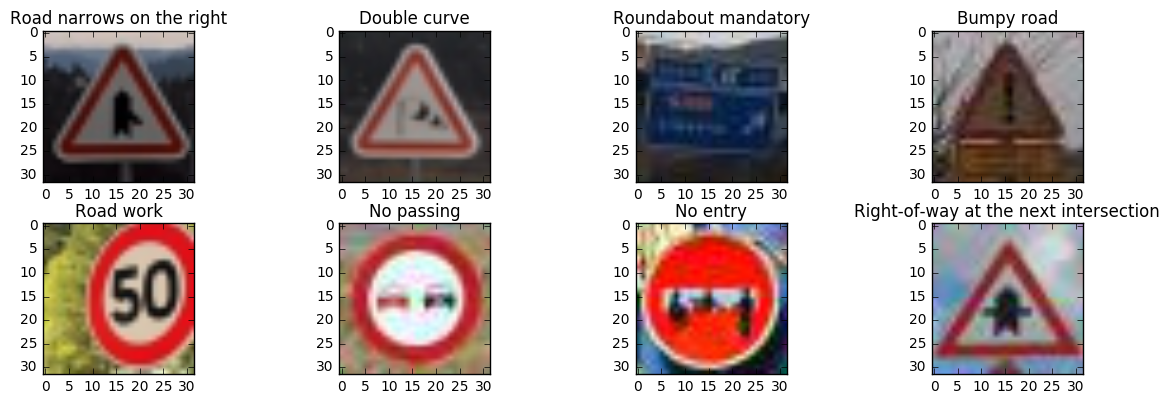

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
fig, ax = plt.subplots(2,4)
fig.set_size_inches(12,4)
fig.tight_layout()
i = 1
images = 8
with tf.Session() as sess:
    # load model to avoid retraining in case we run at different times
    saver.restore(sess, tf.train.latest_checkpoint('./SqueezeNet/'))
    for axis, n in zip(ax.flatten(), samples):
        image = mpimg.imread('test_' + str(i)+ '.jpg')
        # nomalize test set the same way that was done with training
        classify = (image[:,:,0:3] - mean) / std
        prediction = tf.arg_max(logits,1).eval(feed_dict={x: [classify], keep_prob: 1})
        #print(tf.nn.softmax(logits).eval(feed_dict={x: [classify], keep_prob: 1}))
        axis.imshow(image[:,:,0:3]) # remove alpha channel
        i += 1
        axis.set_title(signs[prediction[0]])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I chose five images that were represented in the dataset. Thus, if the system is working correctly it should get them mostly correctly. One of the signs is painted over, one is displaced to the edge of the image and skewed. Another one is a combinations of two signs and the other two are just plain. This should make for 3 somehow harder to identify image and two easy ones.

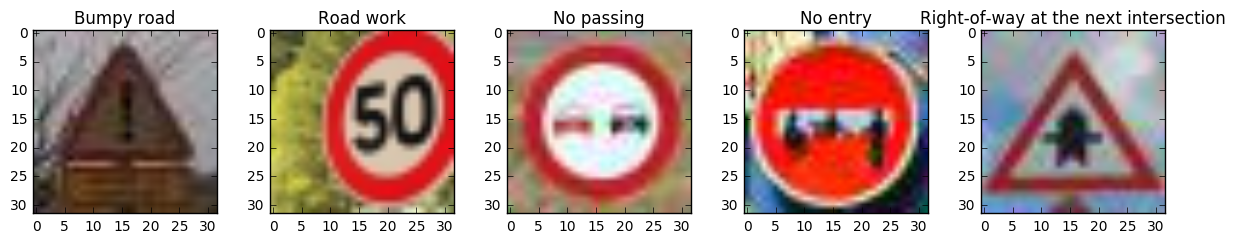

In [30]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
fig, ax = plt.subplots(1,5)
fig.set_size_inches(12,4)
fig.tight_layout()
chosen = [4,5,6,7,8]
with tf.Session() as sess:
    # load model to avoid retraining in case we run at different times
    saver.restore(sess, tf.train.latest_checkpoint('./SqueezeNet/'))
    for axis, n in zip(ax.flatten(), chosen):
        image = mpimg.imread('test_' + str(n)+ '.jpg')
        # nomalize test set the same way that was done with training
        classify = (image[:,:,0:3] - mean) / std
        prediction = tf.arg_max(logits,1).eval(feed_dict={x: [classify], keep_prob: 1})
        #print(tf.nn.softmax(logits).eval(feed_dict={x: [classify], keep_prob: 1}))
        axis.imshow(image[:,:,0:3]) # remove alpha channel
        axis.set_title(signs[prediction[0]])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

This time I got worse accuracy. The network classified correctly 3 out of 5 images.

In [32]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    # load model to avoid retraining in case we run at different times
    saver.restore(sess, tf.train.latest_checkpoint('./SqueezeNet/'))
    for n in chosen:
        image = mpimg.imread('test_' + str(n)+ '.jpg')
        # nomalize test set the same way that was done with training
        classify = (image[:,:,0:3] - mean) / std
        probability = max(tf.nn.softmax(logits).eval(feed_dict={x: [classify], keep_prob: 1})[0])
        print('Image ' + str(n) + ' probability: {:.3f}'.format(probability))

Image 4 probability: 0.509
Image 5 probability: 0.966
Image 6 probability: 1.000
Image 7 probability: 0.861
Image 8 probability: 1.000


In [33]:
with tf.Session() as sess:
    # load model to avoid retraining in case we run at different times
    saver.restore(sess, tf.train.latest_checkpoint('./SqueezeNet/'))
    for n in chosen:
        image = mpimg.imread('test_' + str(n)+ '.jpg')
        # nomalize test set the same way that was done with training
        classify = (image[:,:,0:3] - mean) / std
        probabilities = tf.nn.softmax(logits)
        top_3 = tf.nn.top_k(probabilities, k=3)
        top_class =sess.run(top_3, feed_dict={x: [classify], keep_prob: 1})
        print('Image ' + str(n) + ' gives as top 3 classes with probability')
        for i in range(3):
            c = top_class[1][0][i]
            p = top_class[0][0][i]
            print('- ' + signs[c] + ':   {:.3f}'.format(p))

Image 4 gives as top 3 classes with probability
- Bumpy road:   0.509
- Bicycles crossing:   0.281
- Stop:   0.093
Image 5 gives as top 3 classes with probability
- Road work:   0.966
- Speed limit (50km/h):   0.018
- Speed limit (80km/h):   0.007
Image 6 gives as top 3 classes with probability
- No passing:   1.000
- Slippery road:   0.000
- Yield:   0.000
Image 7 gives as top 3 classes with probability
- No entry:   0.861
- Stop:   0.138
- Speed limit (20km/h):   0.000
Image 8 gives as top 3 classes with probability
- Right-of-way at the next intersection:   1.000
- Beware of ice/snow:   0.000
- Dangerous curve to the right:   0.000


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Results here are a little different than with LeNet. On mislabeled image appears in the top 3. So, if we consider those top 3 choices, the networks predicts correctly 80%. However, one that was correctly classified by LeNet architecture is mislabeled in this case.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.